In [1]:
import pandas as pd
from pandas import Series
import matplotlib as mpl
from matplotlib import pyplot as plt
import boto3 #Need to read and write files to aws s3 bucket
from io import BytesIO as StringIO 
import numpy as np
import seaborn as sns

In [2]:
#Data I got from a Report
client=boto3.client('s3')
obj=client.get_object(Bucket='prod-sdc-tti-911061262852-us-east-1-bucket',Key='abibeka/Data/ProcessVolDat_Class.csv')
dat=pd.read_csv(obj['Body'])
dat.head()

,deviceId,DateTime,VehClass0,VehClass1,VehClass2,VehClass3,SITENAME,Milepost,Direction,TotVeh,PerHGV
0,384,2018-02-01 00:05:00,0,2,2,16,Summit East,325.8,WB,20,80.00
1,384,2018-02-01 00:10:00,0,0,2,7,Summit East,325.8,WB,9,77.78
2,384,2018-02-01 00:15:00,0,3,3,11,Summit East,325.8,WB,17,64.71
3,384,2018-02-01 00:20:00,0,0,4,13,Summit East,325.8,WB,17,76.47
4,384,2018-02-01 00:25:00,0,2,0,8,Summit East,325.8,WB,10,80.00


In [3]:
dat=dat.set_index(keys=['deviceId','DateTime'])
dat.head()

VehClass0  VehClass1  VehClass2  VehClass3  \
deviceId DateTime                                                          
384      2018-02-01 00:05:00          0          2          2         16   
         2018-02-01 00:10:00          0          0          2          7   
         2018-02-01 00:15:00          0          3          3         11   
         2018-02-01 00:20:00          0          0          4         13   
         2018-02-01 00:25:00          0          2          0          8   

                                 SITENAME  Milepost Direction  TotVeh  PerHGV  
deviceId DateTime                                                              
384      2018-02-01 00:05:00  Summit East     325.8        WB      20   80.00  
         2018-02-01 00:10:00  Summit East     325.8        WB       9   77.78  
         2018-02-01 00:15:00  Summit East     325.8        WB      17   64.71  
         2018-02-01 00:20:00  Summit East     325.8        WB      17   76.47  
         2018-02-01 00:25:00  Summit East     325.8        WB      10   80.00

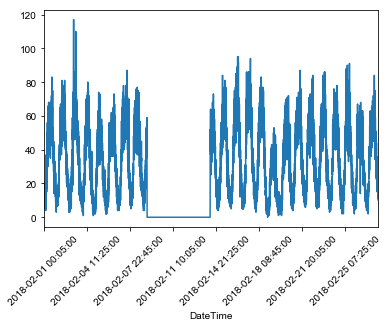

In [4]:
(Series(dat.loc[384].TotVeh)).plot()
plt.xticks(rotation=45)
plt.style.use('seaborn-darkgrid')
plt.show()
#ax.set_xlim('2018-02-01 00:00:00','2018-02-28 00:00:00')

In [5]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [6]:
plt.close()

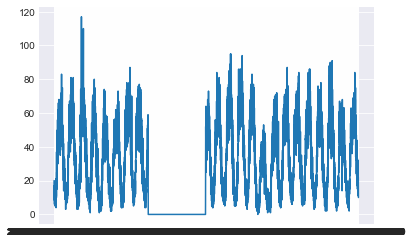

In [11]:
sns.lineplot(data=dat.loc[384].TotVeh)
plt.show()